In [1]:
import matplotlib.pyplot as plt #buat visualisasi grafik
import tensorflow as tf #library klasifikasi yg dipake (gambar)
import numpy as np #buat Array
import cv2 #pengolahan gambar
import os #mengolah file
from tensorflow.keras.preprocessing import image #training gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator #training gambar
from tensorflow.keras.optimizers import RMSprop #testing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/foto/training/happy/download (1).jpg'
img = image.load_img(path)

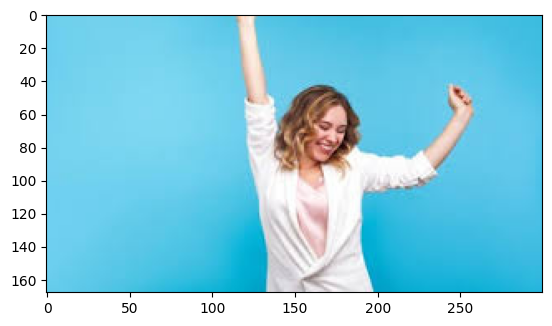

In [4]:
plt.imshow(img)

In [5]:
img = image.random_brightness(img, (0.8, 1.2)) # Changed 0.2 to (0.8, 1.2) which is a tuple

In [6]:
cv2.imread(path).shape

(168, 300, 3)

array([[[235, 206, 108],
        [235, 206, 108],
        [235, 206, 108],
        ...,
        [223, 188,  60],
        [223, 188,  60],
        [223, 188,  60]],

       [[235, 206, 108],
        [235, 206, 108],
        [235, 206, 108],
        ...,
        [223, 188,  60],
        [223, 188,  60],
        [223, 188,  60]],

       [[235, 206, 108],
        [235, 206, 108],
        [235, 206, 108],
        ...,
        [223, 188,  60],
        [223, 188,  60],
        [223, 188,  60]],

       ...,

       [[235, 204, 101],
        [235, 204, 101],
        [235, 204, 101],
        ...,
        [222, 182,  39],
        [222, 182,  39],
        [222, 182,  39]],

       [[234, 203, 100],
        [234, 203, 100],
        [234, 203, 100],
        ...,
        [221, 181,  38],
        [221, 181,  38],
        [221, 181,  38]],

       [[234, 203, 100],
        [234, 203, 100],
        [234, 203, 100],
        ...,
        [220, 180,  37],
        [220, 180,  37],
        [220, 180,  37]]], dtype=uint8)
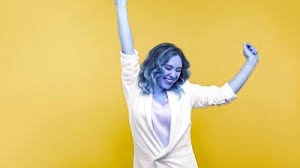

In [7]:
cv2.imread(path)

In [9]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [10]:
#mempersiapkan data untuk di training & di validasi hasil trainingnya
train_dataset = train.flow_from_directory('/content/drive/MyDrive/foto/training',
                                          target_size=(150,150),
                                          batch_size=8,
                                          class_mode='binary')
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/foto/training',
                                          target_size=(150,150),
                                          batch_size=8,
                                          class_mode='binary')

Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [11]:
train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [12]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    #
                                    tf.keras.layers. Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers. Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers. Flatten(),
                                    #
                                    tf.keras.layers. Dense(512,activation='relu'),
                                    #
                                    tf.keras.layers. Dense(1,activation='sigmoid')
                                  ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [15]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=25,
                      epochs=20,
                      validation_data=validation_dataset)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 4/25 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.3792 - loss: 3.9129   

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.4247 - loss: 3.9676 - val_accuracy: 0.5000 - val_loss: 0.9375
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.6192 - loss: 0.7365 - val_accuracy: 0.5000 - val_loss: 0.6485
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5310 - loss: 0.6086 - val_accuracy: 0.5333 - val_loss: 0.7647
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7277 - loss: 0.6881 - val_accuracy: 0.8333 - val_loss: 0.4925
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7656 - loss: 0.5772 - val_accuracy: 0.9000 - val_loss: 0.5033
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7856 - loss: 0.6019 - val_accuracy: 0.5667 - val_loss: 0.5486
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.7655 - loss: 0.4336 - val_accuracy: 0.5000 - val_loss: 1.5369
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.7380 - loss: 0.9840 - val_accuracy: 0.9667 - val_loss: 0

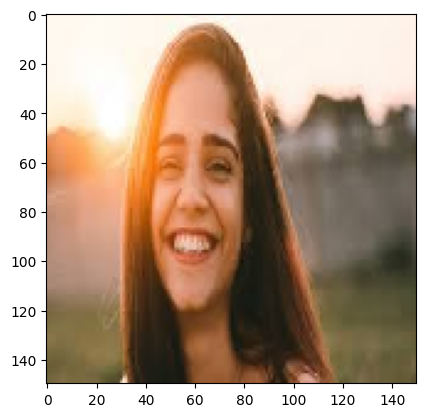

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Happy


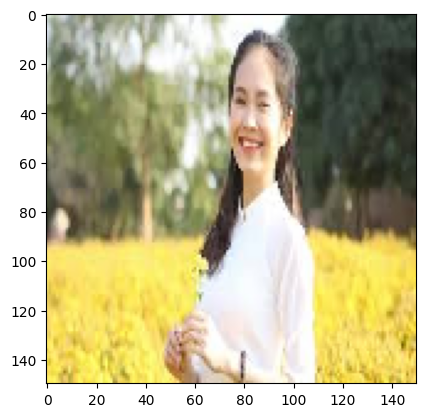

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Happy


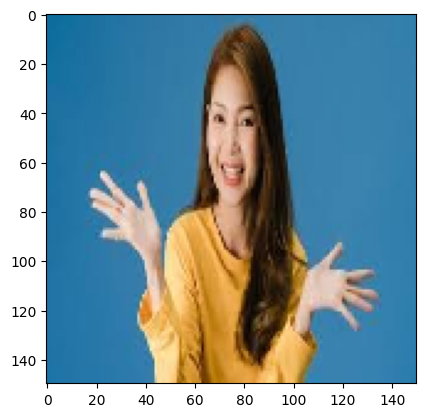

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Happy


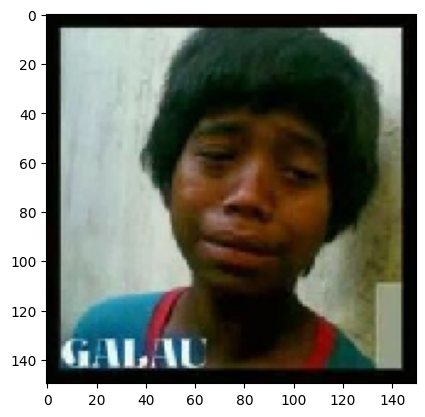

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Not Happy


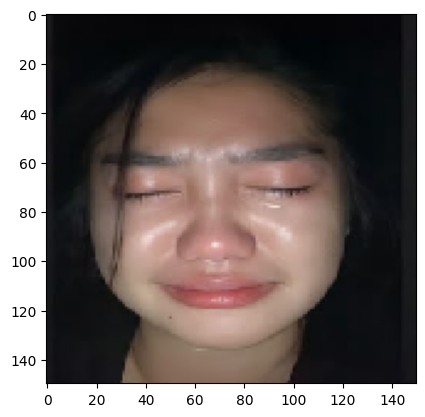

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Not Happy


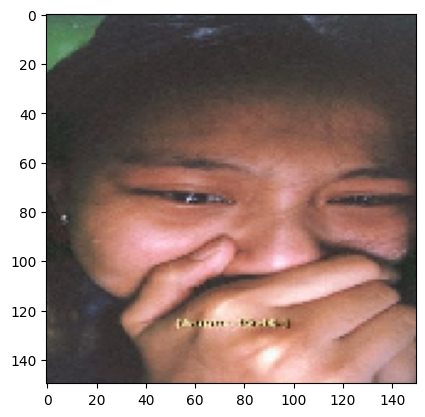

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Not Happy


In [16]:
drive_path = '/content/drive/MyDrive/foto/testing'

for i in os.listdir(drive_path):
  # Check if it's a file before processing
  if os.path.isfile(os.path.join(drive_path, i)):
    img = image.load_img(os.path.join(drive_path, i), target_size=(150, 150))
    imgplot = plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])

    val = model.predict(images)
    if val == 0:
      print('Happy')
    else:
      print('Not Happy')

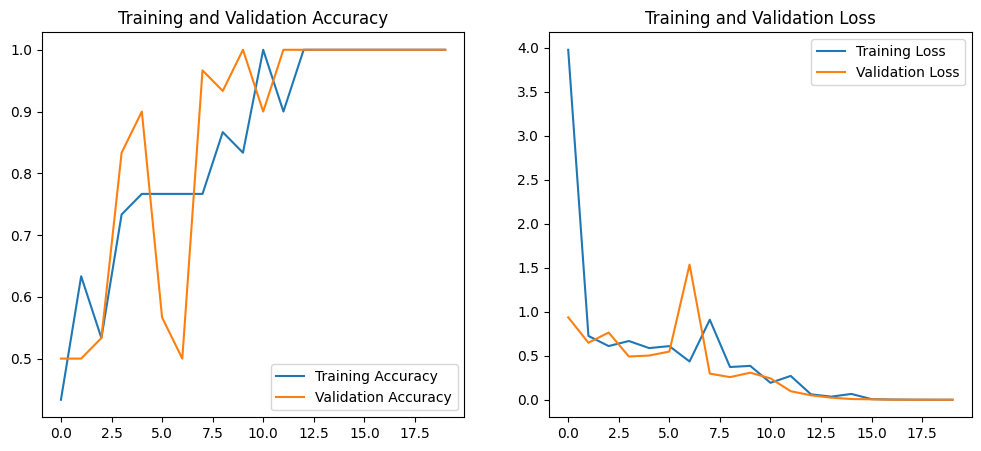

In [17]:
# Plot grafik akurasi dan loss
import matplotlib.pyplot as plt

acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()